# Racial Bias Analysis
## By: Omeed Tehrani
### Inspired by "Safe and Ethical Artificial Intelligence"

## For a recruiter, student, or anyone reading: you're likely wondering... what is COMPAS?

Well, it is short for "Correctional Offender Management Profiling for Alternative Sanctions". As described by wikipedia, it is a case management and decision support tool developed and owned by Northpointe (now Equivant) used by U.S. courts to assess the likelihood of a defendant becoming a recidivist.

It is interesting, because a non-profit organization known as "Propublica", actually found that it discriminates against black defendants. In this project, inspired by a project in a popular course at the University known as "Safe and Ethical AI", we will be using a dataset of COMPAS scores to see if Propublica was correct in their analysis. 

### Data Loading

In [1]:
import pandas as pd
data_frame = pd.read_csv('compas_data.csv')
data_frame


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


## Cleaning the data similar to ways that Propublica achieved it.


In [15]:
# We will first say that 3 months is approximately 60 days. 
# We will pay attention to cases where the COMPAS software detected a crime in a 3 month timespan. Which is reasonable. 
first_3_months = data_frame.loc[data_frame['days_b_screening_arrest'] <= 60]
no_na = first_3_months[first_3_months['score_text'] != 'N/A']
final_data_frame = no_na

# in this case, we are selecting our columns. This is similar to what was done in the class project. This helps us bring anonymity to the dataset.
# An example column that was not deleted in the filtered data is represented as "is_violent_recid". 
# The reason this category is important to keep is that recid is the repeat of criminal behavior by 
# the same criminal, meaning that it is crucial to keep data about a person being repeatingly violent,
#  because that can display a lot about their character and future actions and is completely seperate in 
# relevancy to how old they are, what race or sex they are, etc.

final_data_frame = final_data_frame[['age','sex', 'race', 'juv_fel_count', 'decile_score', 'priors_count', 'is_recid', 'is_violent_recid', 
                   'v_decile_score']]

# race is also important to manipulate. Currently, it is not a numeric value, but we need it to be for data manipulation and model usage.
# 0 will represent women, 1 will represent men. 1 will also display that it belongs to race and 0 will indicate that it does not belong to race.
final_data_frame = final_data_frame.join(pd.get_dummies(final_data_frame['race']))
final_data_frame["sex"] = (final_data_frame["sex"] == "Male") + 0 

# check to see if it was cleaned.
final_data_frame.head()

,age,sex,race,juv_fel_count,decile_score,priors_count,is_recid,is_violent_recid,v_decile_score,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,69,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
1,34,1,African-American,0,3,0,1,1,1,1,0,0,0,0,0
2,24,1,African-American,0,4,4,1,0,3,1,0,0,0,0,0
5,44,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
6,41,1,Caucasian,0,6,14,1,0,2,0,0,1,0,0,0


## Now it is time to analyze our data! 

,race,sex,is_recid
0,African-American,0,0.402337
1,African-American,1,0.592077
2,Asian,0,0.500000
3,Asian,1,0.333333
4,Caucasian,0,0.371212
5,Caucasian,1,0.433782
6,Hispanic,0,0.364583
7,Hispanic,1,0.393162
8,Native American,0,1.000000
9,Native American,1,0.454545


,race,sex,decile_score
0,African-American,0,4.637730
1,African-American,1,5.448965
2,Asian,0,2.000000
3,Asian,1,3.000000
4,Caucasian,0,3.825758
5,Caucasian,1,3.670034
6,Hispanic,0,2.968750
7,Hispanic,1,3.504274
8,Native American,0,8.000000
9,Native American,1,6.000000


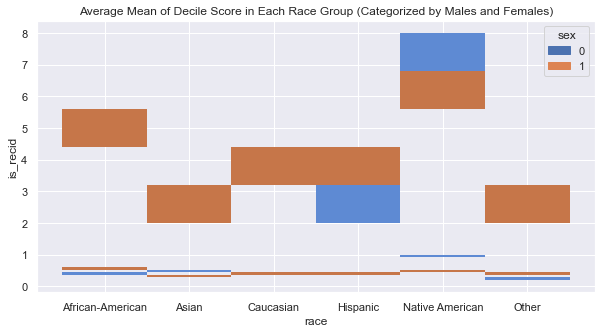

,race,sex,v_decile_score
0,African-American,0,3.580968
1,African-American,1,4.519629
2,Asian,0,1.000000
3,Asian,1,2.533333
4,Caucasian,0,2.532197
5,Caucasian,1,3.049383
6,Hispanic,0,2.333333
7,Hispanic,1,3.121795
8,Native American,0,5.333333
9,Native American,1,4.363636


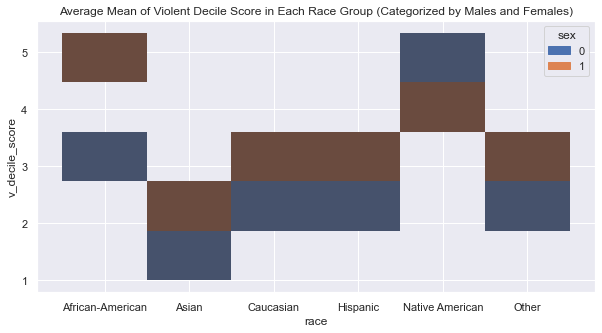

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from string import ascii_letters
from sklearn.metrics import confusion_matrix

categorized_recid = final_data_frame.groupby(['race', 'sex'])['is_recid'].mean().reset_index()

# used to make sure the data was getting grouped correctly.
display(categorized_recid)

sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data=categorized_recid, y = 'is_recid', x = 'race', hue = 'sex', shrink=2).set(title='Average Mean of Criminal Recidivism in Each Race Group (Categorized by Males and Females)');

categorized_decile = final_data_frame.groupby(['race', 'sex'])['decile_score'].mean().reset_index()
sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data=categorized_decile, 
             y = 'decile_score', 
             x = 'race', 
             hue = 'sex', 
             shrink=2).set(title='Average Mean of Decile Score in Each Race Group (Categorized by Males and Females)');

# used to make sure the data was getting grouped correctly.
display(categorized_decile)

plt.show()
categorized_decile_v = final_data_frame.groupby(['race', 'sex'])['v_decile_score'].mean().reset_index()

# used to make sure the data was getting grouped correctly.
display(categorized_decile_v)

sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data=categorized_decile_v, 
             y = 'v_decile_score', 
             x = 'race', 
             hue = 'sex', 
             shrink=2).set(title='Average Mean of Violent Decile Score in Each Race Group (Categorized by Males and Females)');
plt.show()

,race,sex,is_recid
0,African-American,0,0.393443
1,African-American,1,0.592917
2,Asian,0,0.500000
3,Asian,1,0.310345
4,Caucasian,0,0.367220
5,Caucasian,1,0.429981
6,Hispanic,0,0.341463
7,Hispanic,1,0.395785
8,Native American,0,1.000000
9,Native American,1,0.444444


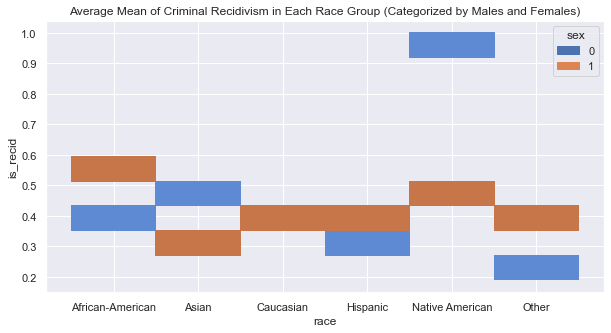

,race,sex,decile_score
0,African-American,0,4.639344
1,African-American,1,5.410129
2,Asian,0,2.000000
3,Asian,1,2.896552
4,Caucasian,0,3.792531
5,Caucasian,1,3.588526
6,Hispanic,0,2.682927
7,Hispanic,1,3.517564
8,Native American,0,8.500000
9,Native American,1,6.000000


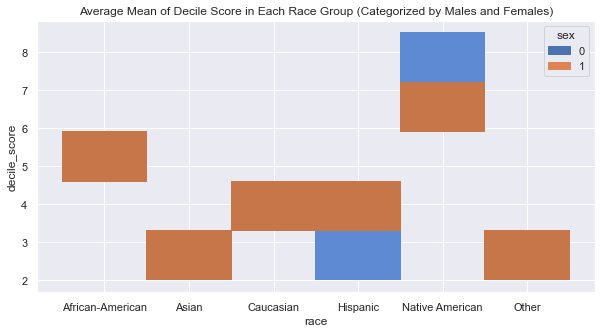

,race,sex,v_decile_score
0,African-American,0,3.604736
1,African-American,1,4.480960
2,Asian,0,1.000000
3,Asian,1,2.482759
4,Caucasian,0,2.526971
5,Caucasian,1,3.020358
6,Hispanic,0,2.146341
7,Hispanic,1,3.138173
8,Native American,0,6.500000
9,Native American,1,4.333333


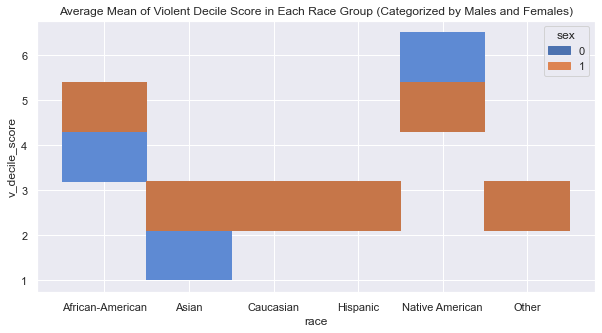

Just a note, the data tables were added/kept with the histograms in both parts 2.1 and 2.2 just to be able to compare the data tables to the visualized data (aka. the histograms). 

## Data Insights

There are a couple of things I have some insight on after looking at the above visualizations and the data tables corresponding to them. 
To give some back story, in our modern day society, it is non-questionable that specific racial groups get much more discussion and attention in comparison to others. For example, using a google trend tool, if you take two racial groups and set them to google trend comparison, almost every single time, Native American gets an extremely low score in comparison to other races. In this tool, the value of 100 represents a "peak popularity", while the value of "0" represents there was not a lot of data to develop a trend score for the term. When "African Americans" is compared to "Native Americans", the Native American score is 3 while the African American score is 50. Since Caucasian is not a common term, if you use "Whites" on a trend search in comparison to Native Americans, "Whites" comes out with a score of 77. In general, this shows that if you opened a news article or searched up about racial issues, you would most likely see something oriented towards those 4 main groups pointed out on the chart. 

Keeping this in mind, if we look back at the visualizations (aka. the histograms), across the board (especially for violent decile and decile scores), Native Americans for both male and female had a higher average in comparison to all other racial groups. Now, this could be because of a flaw in the dataset, but clearly, when we are just looking at means, it seems that Native American's are actually ranking higher in general in comparison to African-Americans, which is another group that is still pretty high on average in comparison to other racial groups. But how could a group that lacks so much attention be the core issue in this data set? Could this mean that there is some issue in the data, or are Native American's actually being marked as more likely to recommit a crime? What is it about Native American's that is causing this in the data? These are big questions that catch my eye beyond just focusing on African Americans. But again, even looking at African American's, their scores on average are much higher than other groups such as Caucasian or Hispanic. This histogram in general raises a lot of questions about why these means are so different from each other, and what is causing these averages to come out the way that they are. I think a big thing is that Native American data prevalence could be low, so the smallest change of score in the data could cause it to skew. Overall, the visualizations definitely raise my curiosity and make me start considering what is going on in the data. 

#### Why I choose Histogram?

I wanted to provide some insight on why I chose this style for my histogram. Although there could be 2 histograms for the genders, in this case, the way that the bars are seperated between gender is really amplifying the differences between racial groups and sexes in those racial groups.